## Question 1

1. The equation for the PDF of the problem is
    $\ f_X(x) = \frac{1}{\sigma \sqrt{2\pi} } e ^{\frac{-( \theta x - y )^2}{2\sigma^2}}$  
    It is a normal distribution


2. Plug and chug equation
.242    


.367  
.319  
.4  
0.277984886131  

[[1.        ]
 [0.49111111]
 [0.73333333]
 [0.        ]
 [0.84444444]] [[1.        ]
 [0.6388443 ]
 [0.79695024]
 [0.        ]
 [0.82504013]]


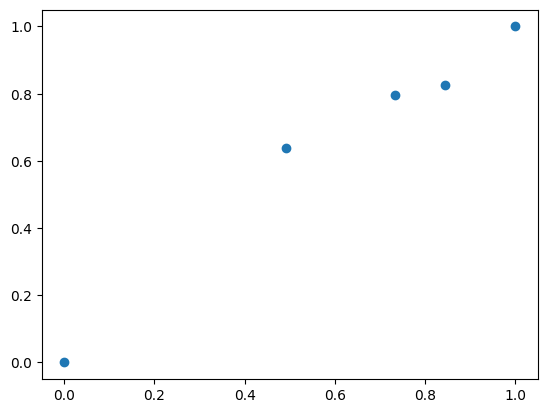

In [101]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
x = [1.4, -.89, .2, -3.1, .7]
y = [2.92, -1.58, .39, -9.54, .74]
scaler = MinMaxScaler()
x = scaler.fit_transform(np.array(x).reshape(-1, 1))
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
print(x,y)
plt.plot(x, y, 'o')
plt.show()

3.  $.242\ \cdot\ .367\ \cdot\ .319\ \cdot\ .4\cdot0.277984886131=  0.00315030997876 $
4.  
$\
p(y|x; \theta_1) = \frac{1}{\sqrt{2\pi\sigma^2}}  \exp\left( -\frac{1}{2\sigma^2} (\mathbf{\theta}^T \mathbf{x}_i - y_i)^2 \right)
$
Using scikit learn we get the value

In [102]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
theta = reg.coef_
print("d) Theta is equal to : ", theta)

d) Theta is equal to :  [[0.97535969]]


e. This probability is much higher.  
[.4, .39, .4 .4 .4] multipled together = 0.009984

## Question 2
a) $p(y=Reception∣x;θ)=g(θ)$  
    $ g(\theta) = \frac{1}{1+e^{-\theta^Tx}}$

$p(y=No Reception∣x;θ)= 1- g(θ)$   
$p(y=No Reception∣x;θ)= 1- \frac{1}{1+e^{-\theta^Tx}}$


b)


In [103]:
data = [
    [0.563, 8.647, 8.129, 9.997, 9.966, 5.554, 7.689, 9.447, 8.496, 2.473, 4.505, 1.291, 9.540, 6.061, 2.286],
    [6.717, 6.181, 3.581, 1.135, 6.715, 5.203, 7.723, 5.201, 8.521, 5.519, 5.609, 8.766, 4.034, 1.340, 0.287],
    ["No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "No"]
]

# Extracting individual lists
x1 = data[0]
x2 = data[1]
reception = data[2]
x1 = scaler.fit_transform(np.array(x1).reshape(-1, 1))
x2 = scaler.fit_transform(np.array(x2).reshape(-1, 1))
)
#calculate pdf for each value
def pdf_log(x_theta, x1, x2):
    temp_x = x_theta[0] + x_theta[1] * x1 + x_theta[2] * x2
    return 1 / (1 + np.exp(temp_x))
x_theta = [1,-1,1]
for i in range(len(x1)):
    print("Probablity No Reception = " , pdf_log(x_theta, x1[i], x2[i]), "Probablity Reception = ", 1-pdf_log(x_theta, x1[i], x2[i]))

Probablity No Reception =  [0.14699785] Probablity Reception =  [0.85300215]
Probablity No Reception =  [0.301908] Probablity Reception =  [0.698092]
Probablity No Reception =  [0.35743914] Probablity Reception =  [0.64256086]
Probablity No Reception =  [0.47501787] Probablity Reception =  [0.52498213]
Probablity No Reception =  [0.31834364] Probablity Reception =  [0.68165636]
Probablity No Reception =  [0.25908274] Probablity Reception =  [0.74091726]
Probablity No Reception =  [0.24570772] Probablity Reception =  [0.75429228]
Probablity No Reception =  [0.34573288] Probablity Reception =  [0.65426712]
Probablity No Reception =  [0.24412227] Probablity Reception =  [0.75587773]
Probablity No Reception =  [0.19551036] Probablity Reception =  [0.80448964]
Probablity No Reception =  [0.22973325] Probablity Reception =  [0.77026675]
Probablity No Reception =  [0.12754606] Probablity Reception =  [0.87245394]
Probablity No Reception =  [0.37980944] Probablity Reception =  [0.62019056]
Pro

c)  $\theta^T x = 0 
=>  \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0
=> x_2 = - \frac{\theta_0 + \theta_1 x_1}{\theta_2}$

100


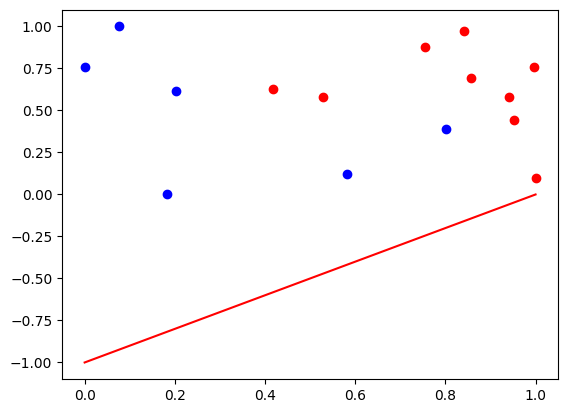

In [104]:
theta = x_theta
def line_log(x1):
    return (-theta[0] - theta[1]*x1)/theta[2]
for x in range(len(x1)):
    plt.scatter(x1[x], x2[x], color='red' if reception[x] == "Yes" else 'blue', marker='o', label='Yes' if reception[x] == "Yes" else 'No')
#create linssspace 0,1
x1_line = np.linspace(0,1,100)
x1_line = list(x1_line)
print(len(x1_line))
x2_line = []
for i in x1_line:
    x2_line.append(line_log(i))
plt.plot(x1_line, x2_line, 'r', label='Decision Boundary')
# plt.legend()
plt.show()

$ m = 1 \\
b = -1$

d)


In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2 , include_bias=False)
# X = [[x1[i], x2[i]] for i in range(len(x1))]
# print(X)
model = LinearRegression()
X_poly = poly.fit_transform([x1[1], x2[1]], reception)
print("d)", 1, X_poly)
# model.fit(X_poly, reception)

# print(model.coef_)


d) 1 [[0.85690057 0.73427859]
 [0.69512914 0.48320452]]


e)


In [ ]:
x1_copy = x1
x2_copy = x2


In [114]:
def pdf_log_poly(x_theta):
    return 1 / (1 + np.exp(x_theta))


In [116]:
theta_new =  [-0.125, 0.808, -0.303, 0.027, 0.567, -0.206,0.244, 0.724, 0.899]
#reshape
for i in range(len(x1_copy)):
    print(i)
    x1 = float(x1_copy[i])
    x2 = float(x2_copy[i])
    poly = [1, x1, x2, x1*x2, x1**2, x2**2, x1**2*x2, x1*x2**2, x1**2*x2**2]
    # print(poly)
    # poly = np.array(poly)
    theta_new = np.array(theta_new)
    
    
    # print(theta_new)
    matrix_mul = np.matmul(theta_new, poly)
    # print(matrix_mul)
    print("Probablity No Reception = ", pdf_log_poly(matrix_mul), "Probablity Reception = ", 1 - pdf_log_poly(matrix_mul))

# poly = PolynomialFeatures(degree=3)
# X_poly = poly.fit_transform([x1, x2], reception)
# print(X_poly)
# #matrix multiple theta and X_poly
# matrix_product = np.matmul(theta_new, X_poly.T)


0
Probablity No Reception =  0.6161517430554234 Probablity Reception =  0.3838482569445766
1
Probablity No Reception =  0.19264387198299054 Probablity Reception =  0.8073561280170094
2
Probablity No Reception =  0.27226112687102544 Probablity Reception =  0.7277388731289746
3
Probablity No Reception =  0.22080644715619416 Probablity Reception =  0.7791935528438059
4
Probablity No Reception =  0.1163234144916875 Probablity Reception =  0.8836765855083125
5
Probablity No Reception =  0.38285316609365294 Probablity Reception =  0.6171468339063471
6
Probablity No Reception =  0.20755052232118748 Probablity Reception =  0.7924494776788125
7
Probablity No Reception =  0.17787322440199066 Probablity Reception =  0.8221267755980093
8
Probablity No Reception =  0.13823009330504973 Probablity Reception =  0.8617699066949502
9
Probablity No Reception =  0.531007203940512 Probablity Reception =  0.46899279605948796
10
Probablity No Reception =  0.43656258095018313 Probablity Reception =  0.5634374